In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as pdf
from sklearn import preprocessing 
import statsmodels.api as sm
# import the math module  
import math 
import scipy.stats
import pylab

In [2]:
from sklearn.utils import check_array 
from sklearn import preprocessing 
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [3]:
from calendar import monthrange

In [4]:
#print multiple statements in same line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity ="all"
%matplotlib inline

In [5]:
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
import statsmodels.graphics.tsaplots as sgt

In [6]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
dfFeederData = pd.read_csv('Interuption_Feeder_1.csv', parse_dates=['ConsumptionDate'], index_col='ConsumptionDate',date_parser=dateparse)
print ('\n Parsed Data:')
dfFeederData.head()


 Parsed Data:


,Feeder,TotalDemand,TotalRevenue,TotalOutageCuts,TotalOutageMinutes,TotalMinutesPerCut
ConsumptionDate,,,,,,
2019-01-01,Feeder_1,624159.0,4985411.96,24,212,8
2019-02-01,Feeder_1,606149.5,4872530.70,36,633,17
2019-03-01,Feeder_1,637723.5,5203000.43,26,187,7
2019-04-01,Feeder_1,718271.5,5617795.97,17,287,16
2019-05-01,Feeder_1,705281.5,5566052.72,41,645,15


In [7]:
dfFeederData.head()
dfFeederData.tail()
dfFeederData.info()
dfFeederData.describe()

,Feeder,TotalDemand,TotalRevenue,TotalOutageCuts,TotalOutageMinutes,TotalMinutesPerCut
ConsumptionDate,,,,,,
2019-01-01,Feeder_1,624159.0,4985411.96,24,212,8
2019-02-01,Feeder_1,606149.5,4872530.70,36,633,17
2019-03-01,Feeder_1,637723.5,5203000.43,26,187,7
2019-04-01,Feeder_1,718271.5,5617795.97,17,287,16
2019-05-01,Feeder_1,705281.5,5566052.72,41,645,15


,Feeder,TotalDemand,TotalRevenue,TotalOutageCuts,TotalOutageMinutes,TotalMinutesPerCut
ConsumptionDate,,,,,,
2019-02-01,Feeder_1,606149.5,4872530.70,36,633,17
2019-03-01,Feeder_1,637723.5,5203000.43,26,187,7
2019-04-01,Feeder_1,718271.5,5617795.97,17,287,16
2019-05-01,Feeder_1,705281.5,5566052.72,41,645,15
2019-06-01,Feeder_1,715699.5,6126206.23,23,1015,44


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2019-01-01 to 2019-06-01
Data columns (total 6 columns):
Feeder                6 non-null object
TotalDemand           6 non-null float64
TotalRevenue          6 non-null float64
TotalOutageCuts       6 non-null int64
TotalOutageMinutes    6 non-null int64
TotalMinutesPerCut    6 non-null int64
dtypes: float64(2), int64(3), object(1)
memory usage: 336.0+ bytes


,TotalDemand,TotalRevenue,TotalOutageCuts,TotalOutageMinutes,TotalMinutesPerCut
count,6.000000,6.000000e+00,6.000000,6.000000,6.000000
mean,667880.750000,5.395166e+06,27.833333,496.500000,17.833333
std,50707.938264,4.671530e+05,8.931219,325.621713,13.496913
min,606149.500000,4.872531e+06,17.000000,187.000000,7.000000
25%,627550.125000,5.039809e+06,23.250000,230.750000,9.750000
50%,671502.500000,5.384527e+06,25.000000,460.000000,15.500000
75%,713095.000000,5.604860e+06,33.500000,642.000000,16.750000
max,718271.500000,6.126206e+06,41.000000,1015.000000,44.000000


In [8]:
def mean_absolute_percentage_error(y_true, y_pred): 
    print(np.abs((y_true - y_pred) / y_true))
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Data Understanding and Pre-Processing

In [9]:
dfFeederData = dfFeederData.reset_index()
dfFeederData.head()

,ConsumptionDate,Feeder,TotalDemand,TotalRevenue,TotalOutageCuts,TotalOutageMinutes,TotalMinutesPerCut
0,2019-01-01,Feeder_1,624159.0,4985411.96,24,212,8
1,2019-02-01,Feeder_1,606149.5,4872530.70,36,633,17
2,2019-03-01,Feeder_1,637723.5,5203000.43,26,187,7
3,2019-04-01,Feeder_1,718271.5,5617795.97,17,287,16
4,2019-05-01,Feeder_1,705281.5,5566052.72,41,645,15


<Figure size 1440x360 with 0 Axes>

Text(0.5, 1, 'Pair Plot for Feeder')

<Figure size 1440x360 with 0 Axes>

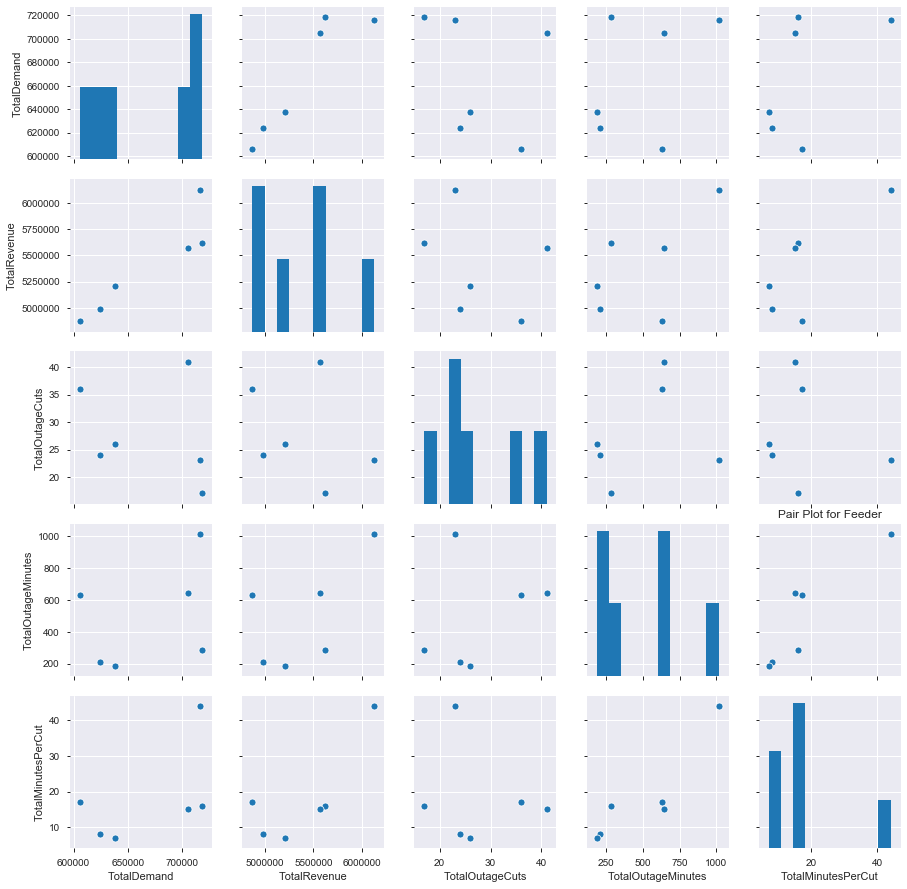

In [10]:
plt.figure(figsize=(20,5))
sns.pairplot(data =dfFeederData)
plt.title('Pair Plot for Feeder')
plt.show()

Text(0.5, 1.0, 'Feeder wise - Total Min / Total Min per Cut ')

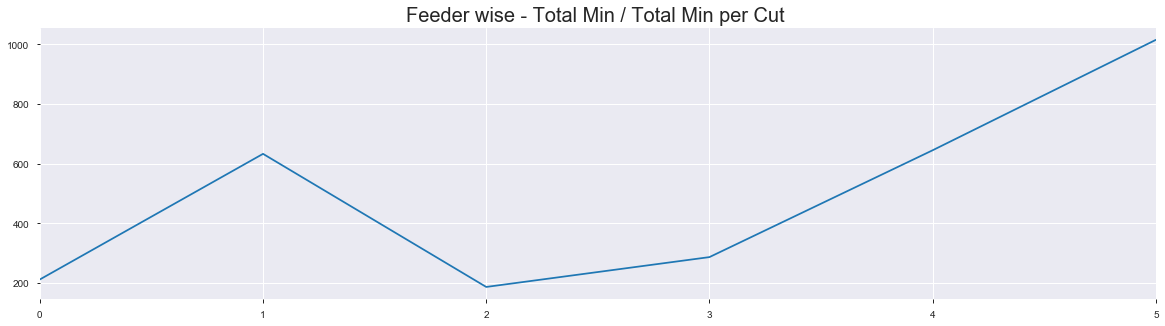

In [11]:
dfFeederData.TotalOutageMinutes.plot(figsize =(20,5))
#dfDemandInterruption.feeder.plot(figsize =(20,5), title ='Demand (consumed Units)')
#dfFeederData.TotalDemand.plot(figsize =(20,5))
#dfFeederData.Feeder_ID.plot(figsize =(20,5))
plt.title('Feeder wise - Total Min / Total Min per Cut ', size=20)
plt.show()

Text(0.5, 1.0, 'Feeder wise - Total Min / Total Min per Cut ')

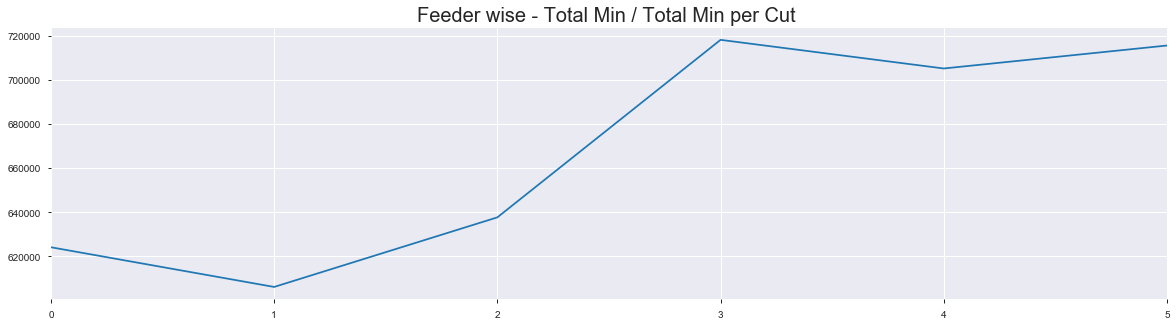

In [12]:
#dfFeederData.TotalOutageMinutes.plot(figsize =(20,5))
#dfDemandInterruption.feeder.plot(figsize =(20,5), title ='Demand (consumed Units)')
dfFeederData.TotalDemand.plot(figsize =(20,5))
#dfFeederData.Feeder_ID.plot(figsize =(20,5))
plt.title('Feeder wise - Total Min / Total Min per Cut ', size=20)
plt.show()

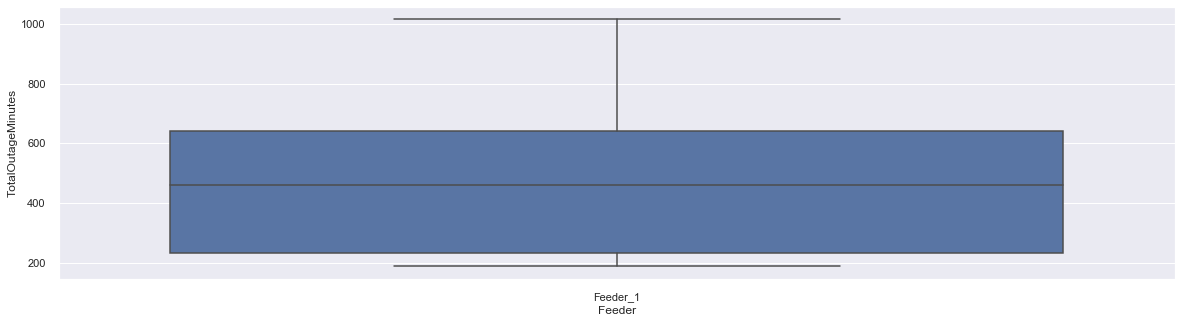

In [13]:
# set the size of the figure
sns.set(rc={'figure.figsize':(20,5)})
sns.boxplot(x="Feeder", y="TotalOutageMinutes", data=dfFeederData.loc[dfFeederData.ne(0).all(axis=1)])

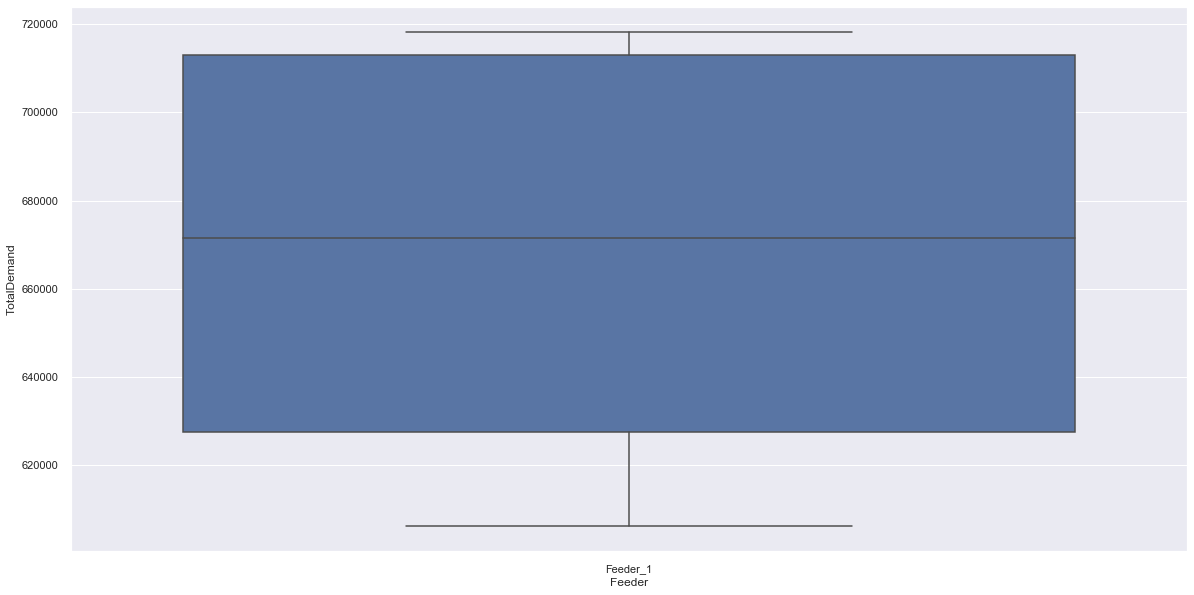

In [14]:
# set the size of the figure
sns.set(rc={'figure.figsize':(20,10)})
sns.boxplot(x="Feeder", y="TotalDemand", data=dfFeederData)

In [15]:
 # variables correlations
IncomeCorr= round(dfFeederData.corr(),3)

In [16]:
IncomeCorr.style.background_gradient(cmap='coolwarm')
#plt.figure(figsize =(15,10))
#sns.heatmap(IncomeCorr,cmap='Blues',annot=True)
#plt.show()

,TotalDemand,TotalRevenue,TotalOutageCuts,TotalOutageMinutes,TotalMinutesPerCut
TotalDemand,1,0.916,-0.25,0.401,0.544
TotalRevenue,0.916,1,-0.29,0.608,0.786
TotalOutageCuts,-0.25,-0.29,1,0.309,-0.155
TotalOutageMinutes,0.401,0.608,0.309,1,0.89
TotalMinutesPerCut,0.544,0.786,-0.155,0.89,1


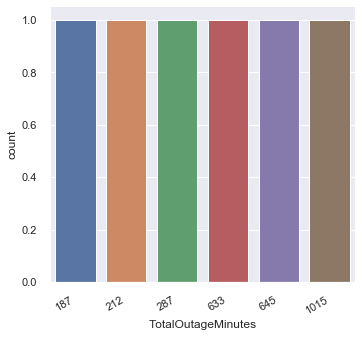

In [17]:
ax = sns.catplot(x='TotalOutageMinutes',kind='count',data=dfFeederData,orient="h")
ax.fig.autofmt_xdate()

<BarContainer object of 6 artists>

<BarContainer object of 6 artists>

Text(0.5, 1.0, 'Plot Total Demand v/s Total Mins Outage')

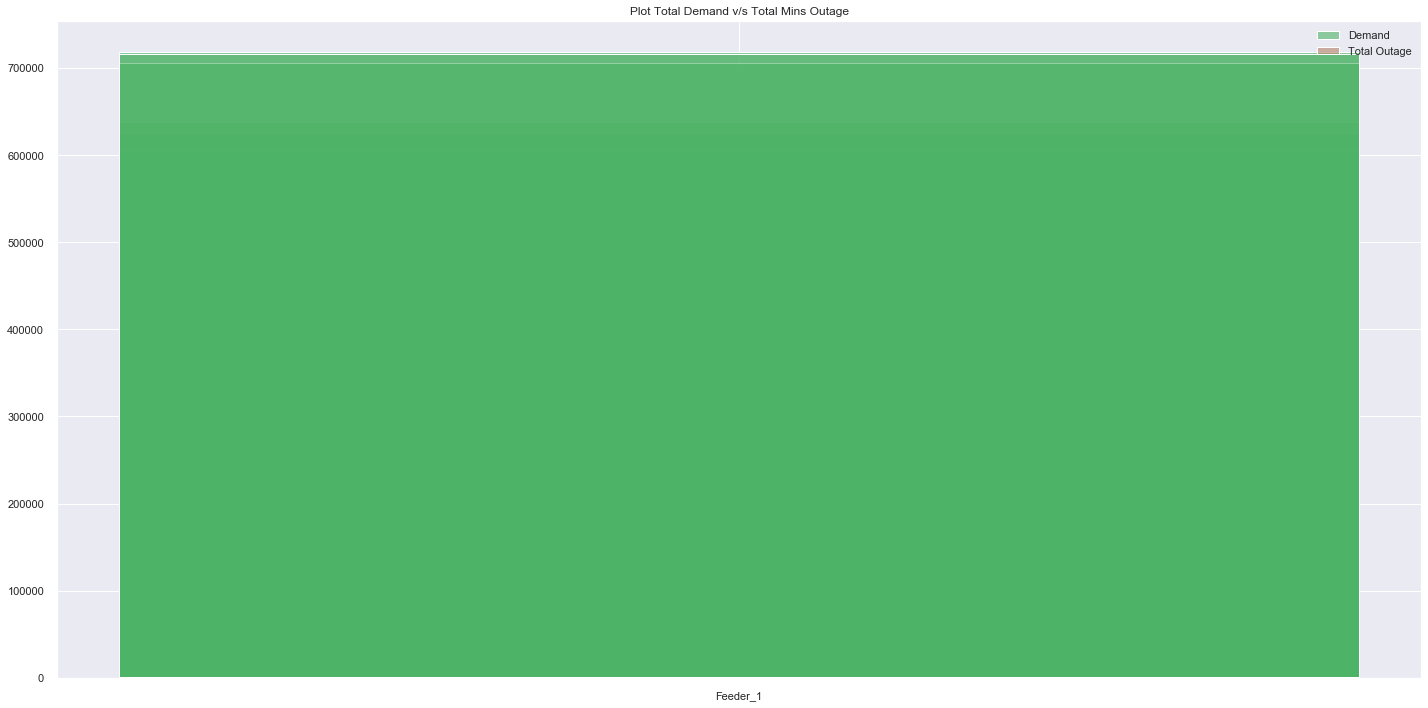

In [18]:
dfFeeder = dfFeederData.loc[dfFeederData.ne(0).all(axis=1)]

# Create barplot
plt.bar(dfFeeder.Feeder, dfFeeder.TotalDemand,   color = (0.3,0.7,0.4,0.6), label='Demand')
plt.bar(dfFeeder.Feeder, dfFeeder.TotalOutageMinutes, color = (0.7,0.5,0.4,0.6), label='Total Outage')
 
# Create legend
plt.legend()
plt.legend()
plt.title('Plot Total Demand v/s Total Mins Outage')
plt.tight_layout()
# Show graphic
plt.show()

In [19]:
#calculate days in a month for each row

dfFeederData['MonthDays'] = 0
dfFeederData['UnitsPerMin'] =0.0
for row in dfFeederData.index:
    dfFeederData['MonthDays'][row] = monthrange(dfFeederData.ConsumptionDate[row].year, dfFeederData.ConsumptionDate[row].month)[1]
    dfFeederData['UnitsPerMin'][row] = round((dfFeederData.TotalDemand[row]/dfFeederData.MonthDays[row])/(24*60),3)


C:\Users\kiran\Anaconda3\envs\TimeSeries\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\kiran\Anaconda3\envs\TimeSeries\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [20]:
dfFeederData['TotalUnitsLost'] = 0.00
for row in dfFeederData.index:
    dfFeederData['TotalUnitsLost'][row] = round((dfFeederData.UnitsPerMin[row]*dfFeederData.TotalOutageMinutes[row]),3)

C:\Users\kiran\Anaconda3\envs\TimeSeries\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 720x144 with 0 Axes>

Text(0.5, 1.0, 'Demand (FeederWise)')

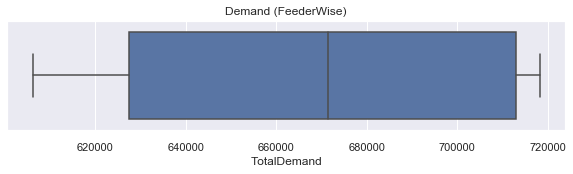

<Figure size 720x144 with 0 Axes>

Text(0.5, 1.0, 'Total Mins - Outage (FeederWise)')

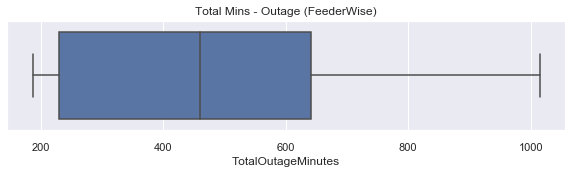

<Figure size 720x144 with 0 Axes>

Text(0.5, 1.0, 'Total Loss - Units (FeederWise)')

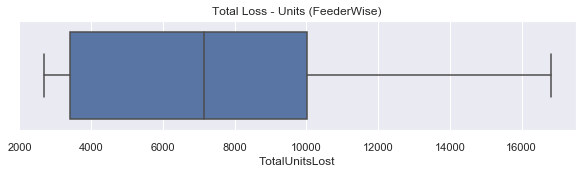

In [21]:
plt.figure(figsize=(10,2))
sns.boxplot(dfFeederData.TotalDemand)
plt.title('Demand (FeederWise)')
plt.show()

plt.figure(figsize=(10,2))
sns.boxplot(dfFeederData.TotalOutageMinutes)
plt.title('Total Mins - Outage (FeederWise)')
plt.show()

plt.figure(figsize=(10,2))
sns.boxplot(dfFeederData.TotalUnitsLost)
plt.title('Total Loss - Units (FeederWise)')
plt.show()

<Figure size 1440x576 with 0 Axes>

Text(0.5, 1.0, 'Current Response v/s Units Lost v/s Actual Demand')

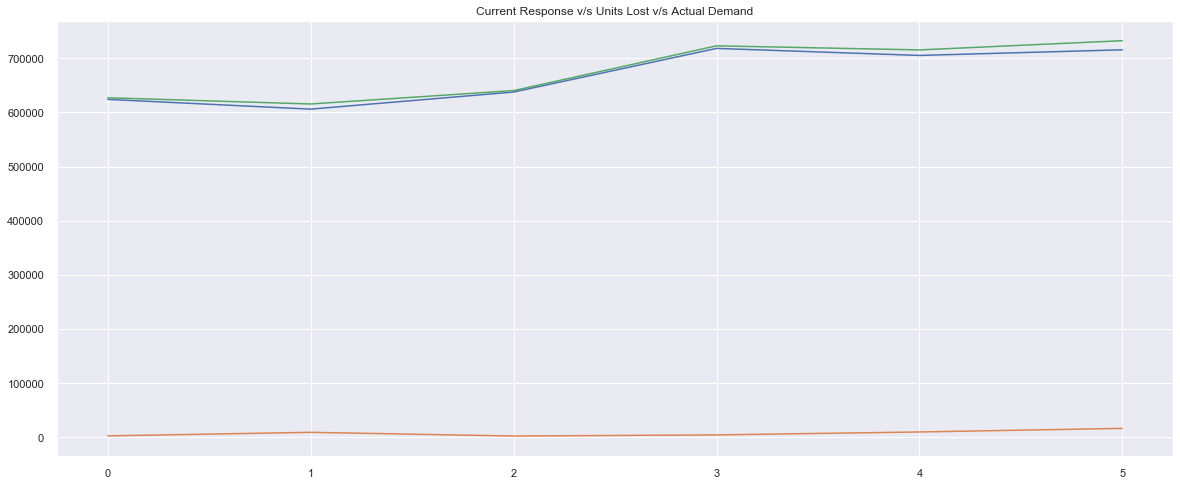

In [22]:
plt.figure(figsize=(20,8))
plt.plot( dfFeederData['TotalDemand'], label='Train')
plt.plot(dfFeederData['TotalUnitsLost'], label='Test')
plt.plot(dfFeederData['TotalUnitsLost'] +dfFeederData['TotalDemand'] , label='Naive Forecast')

plt.title('Current Response v/s Units Lost v/s Actual Demand')
plt.show()

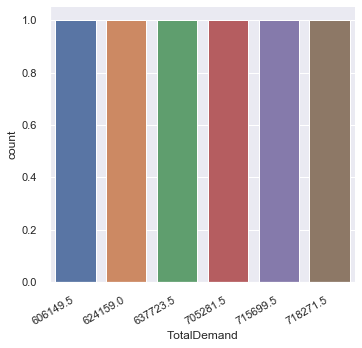

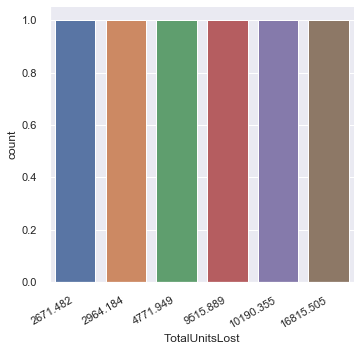

In [23]:
ax = sns.catplot(x='TotalDemand',kind='count',data=dfFeederData,orient="h")
ax.fig.autofmt_xdate()
ax = sns.catplot(x='TotalUnitsLost',kind='count',data=dfFeederData,orient="h")
ax.fig.autofmt_xdate()

 <h5>ACF - Autocorrelation function</h5>

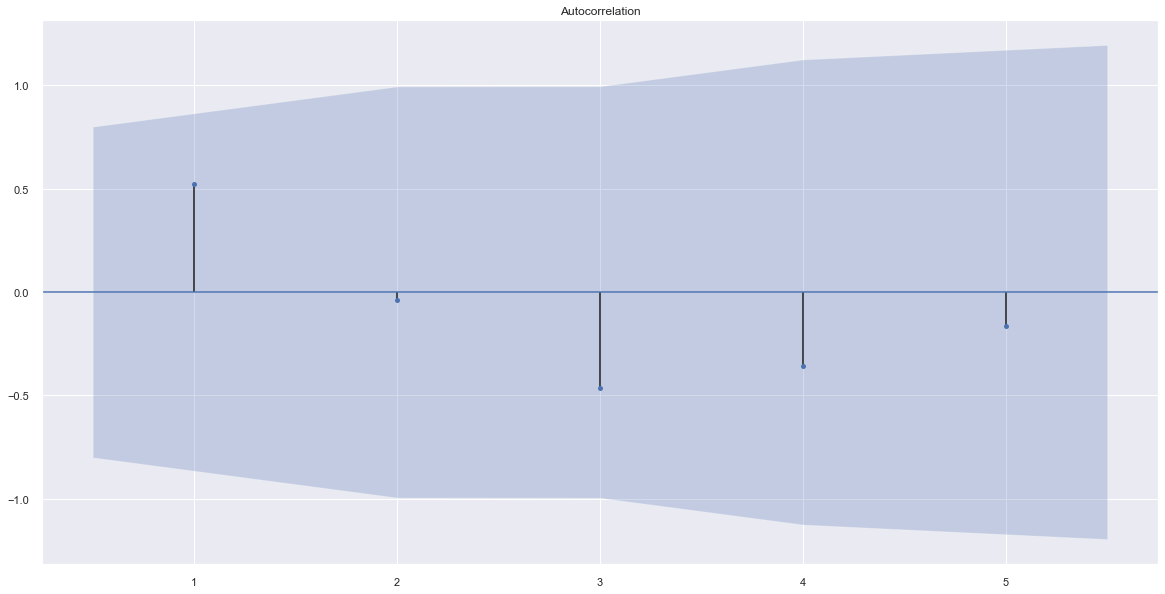

Text(0.5, 1, 'ACF - Demand')

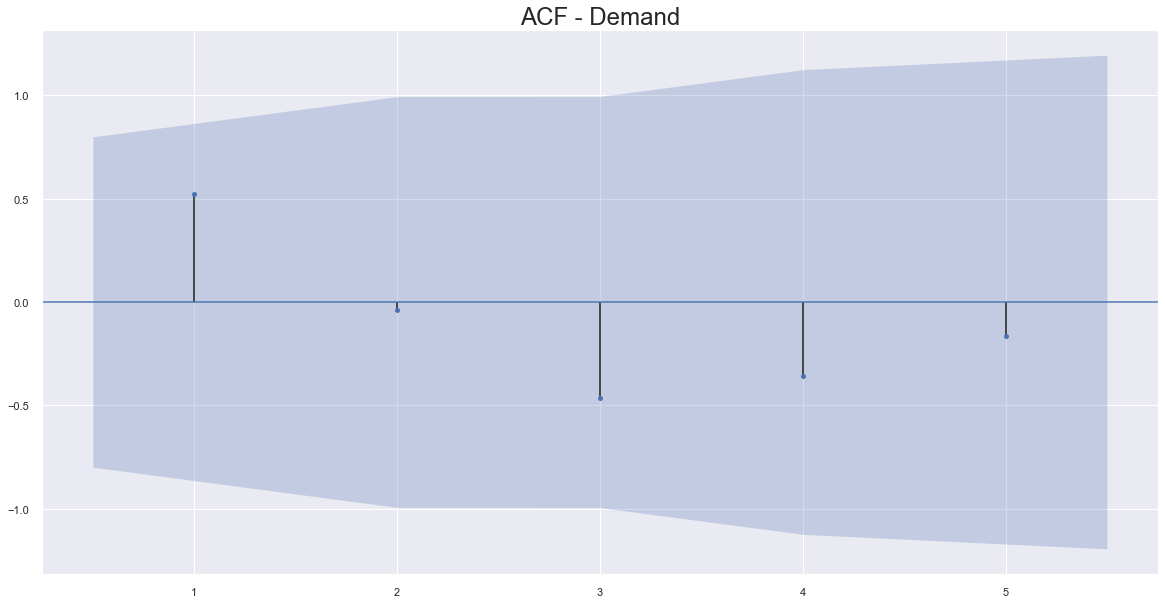

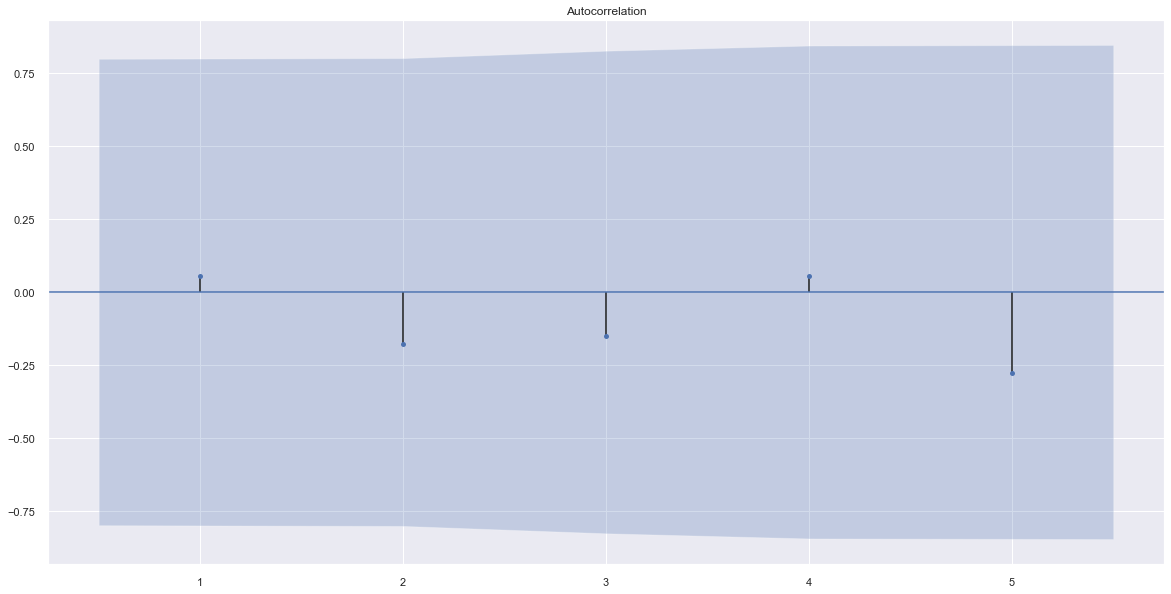

Text(0.5, 1, 'ACF - Total Outage in mins')

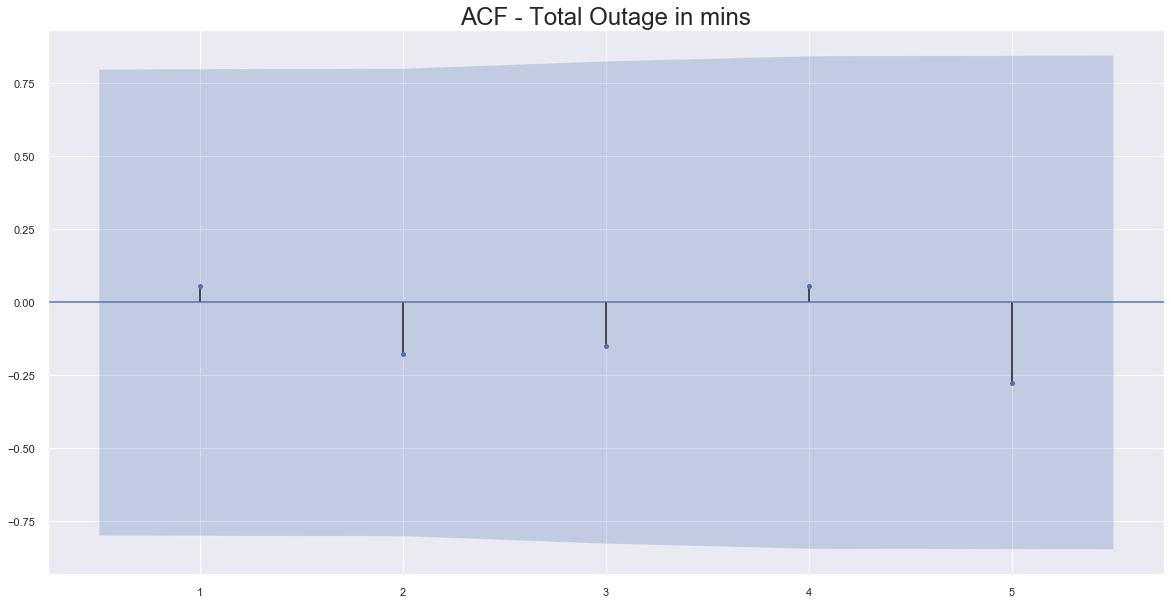

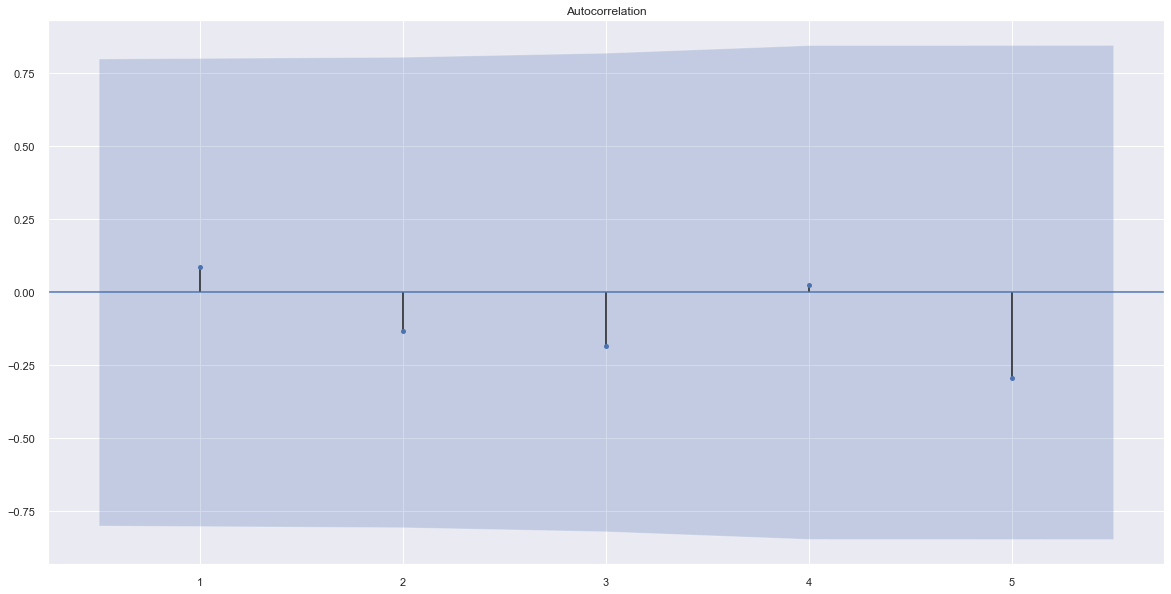

Text(0.5, 1, 'ACF - Total Units Lost')

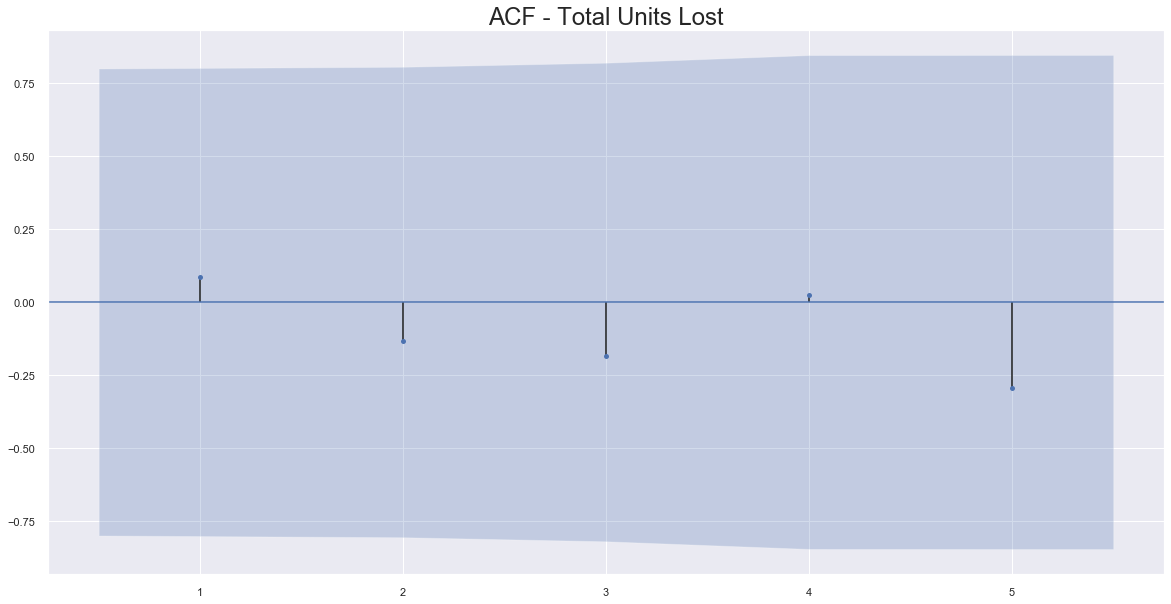

In [24]:
plt.close()
sgt.plot_acf(dfFeederData.TotalDemand, zero=False)
plt.title("ACF - Demand", size = 24)
plt.show()

plt.close()
sgt.plot_acf(dfFeederData.TotalOutageMinutes,lags=5 , zero=False)
plt.title("ACF - Total Outage in mins", size = 24)
plt.show()

plt.close()
sgt.plot_acf(dfFeederData.TotalUnitsLost,lags=5 , zero=False)
plt.title("ACF - Total Units Lost", size = 24)
plt.show()

<h5>PACF - Partial Autocorrelation function</h5>

C:\Users\kiran\Anaconda3\envs\TimeSeries\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
C:\Users\kiran\Anaconda3\envs\TimeSeries\lib\site-packages\statsmodels\regression\linear_model.py:1350: RuntimeWarning: invalid value encountered in double_scalars
  r[k] = (X[0:-k] * X[k:]).sum() / denom(k)


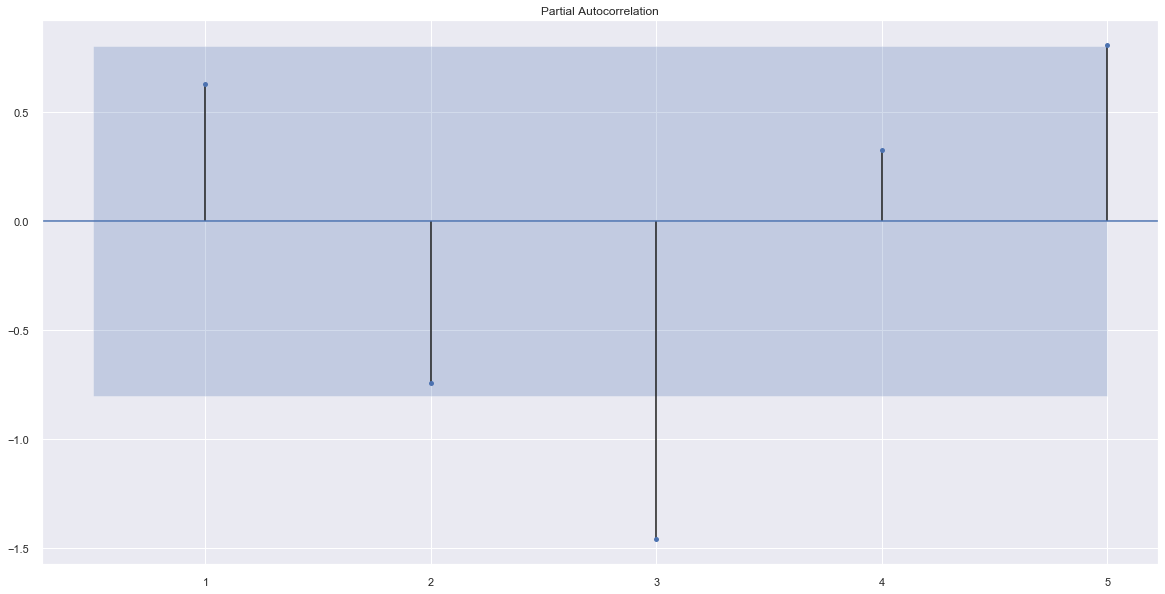

Text(0.5, 1, 'PACF - Demand')

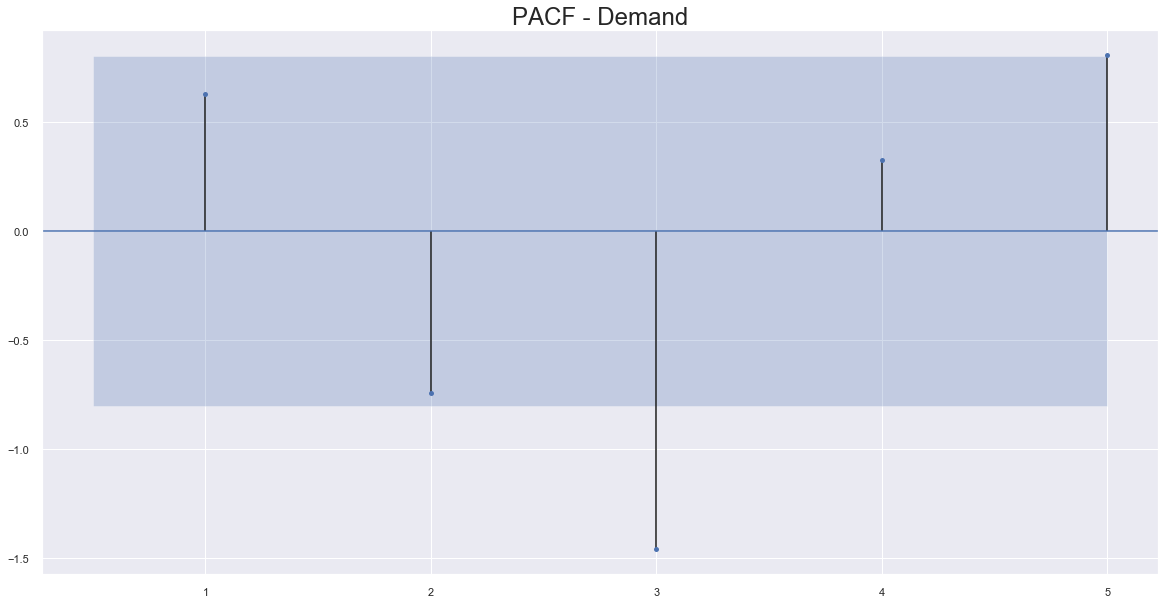

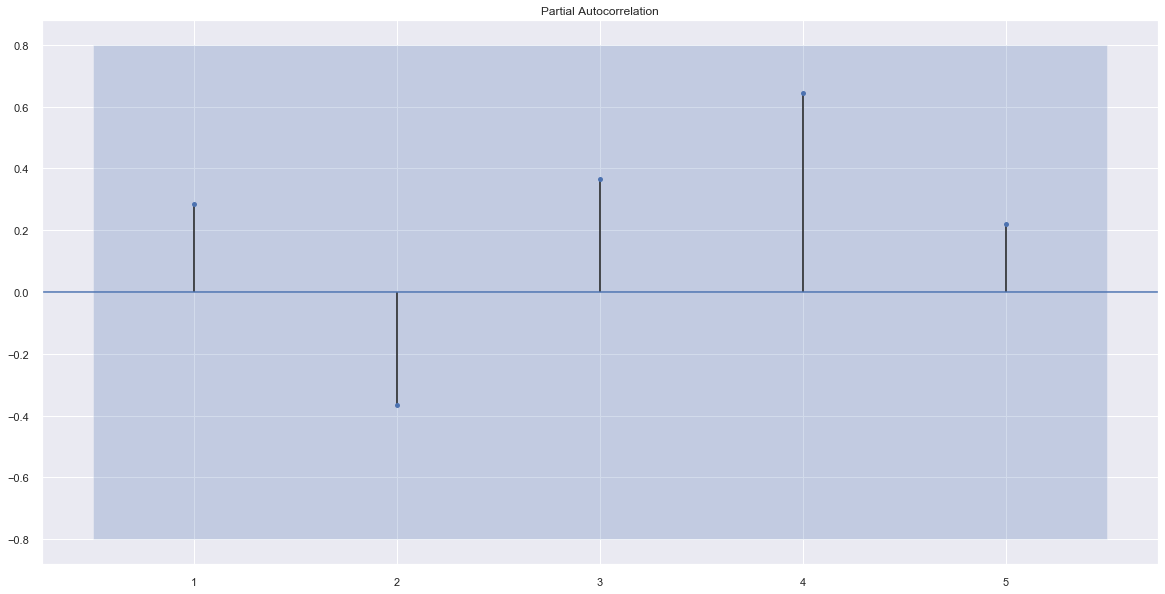

Text(0.5, 1, 'PACF - Total Outage in mins')

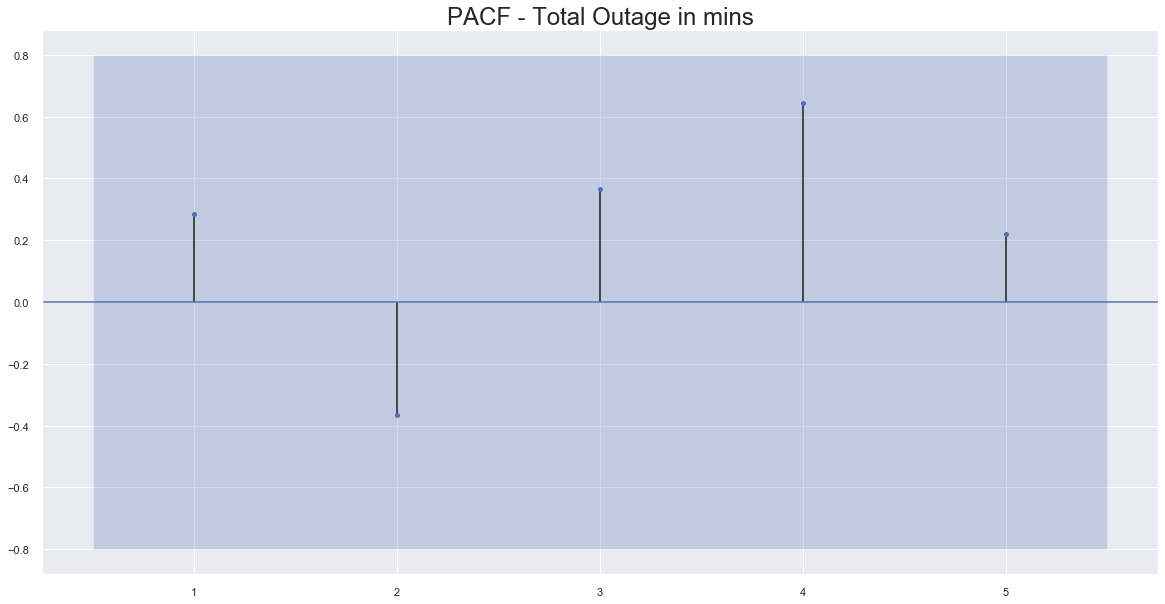

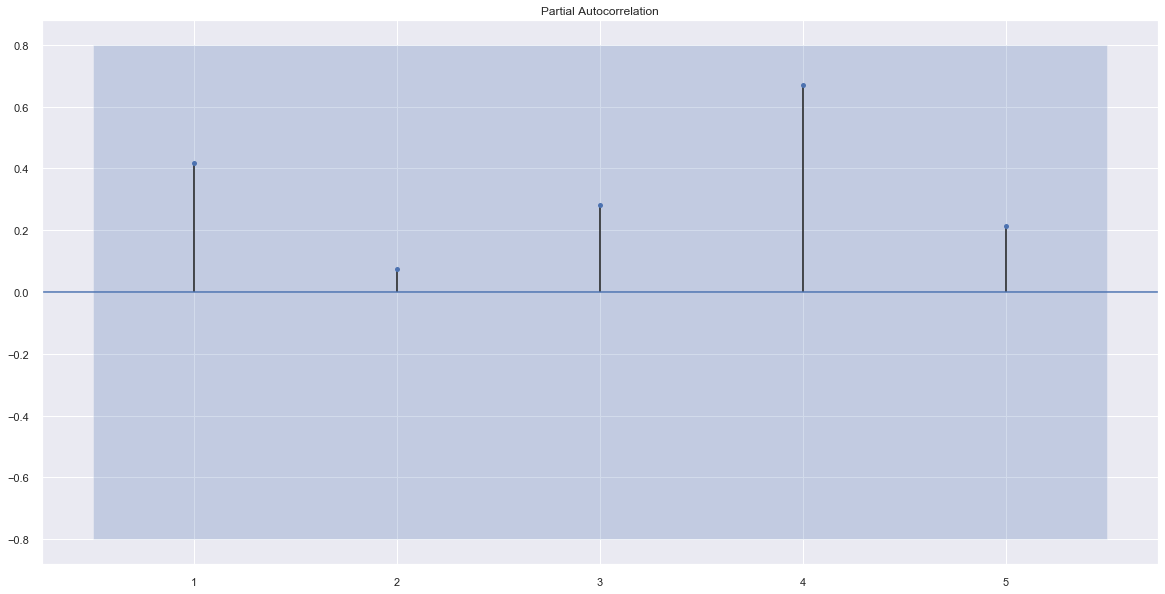

Text(0.5, 1, 'PACF - Total Units Lost')

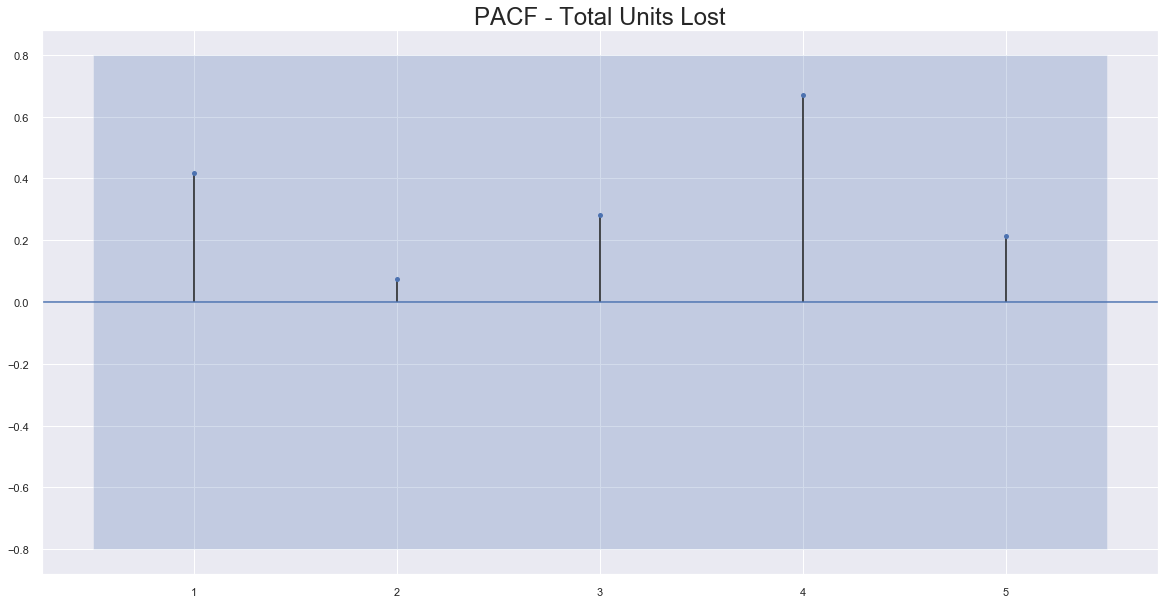

In [25]:
plt.close()
sgt.plot_pacf(dfFeederData.TotalDemand,lags=40 , zero=False)
plt.title("PACF - Demand", size = 24)
plt.show()
plt.close()
sgt.plot_pacf(dfFeederData.TotalOutageMinutes, zero=False, method=('ols'))
plt.title("PACF - Total Outage in mins", size = 24)
plt.show()

plt.close()
sgt.plot_pacf(dfFeederData.TotalUnitsLost, zero=False, method=('ols'))
plt.title("PACF - Total Units Lost", size = 24)
plt.show()

In [26]:
size = int(len(dfFeederData)*.8)
size

4

In [27]:
dfFeederData['ConsumptionDate'] = pd.to_datetime(dfFeederData.ConsumptionDate, infer_datetime_format=True , format=('%Y-%m-%d'))
dfFeederData.ConsumptionDate.describe()

count                       6
unique                      6
top       2019-04-01 00:00:00
freq                        1
first     2019-01-01 00:00:00
last      2019-06-01 00:00:00
Name: ConsumptionDate, dtype: object

In [28]:
dfFeederData.set_index("ConsumptionDate",inplace=True)

In [29]:
dfFeederData

,Feeder,TotalDemand,TotalRevenue,TotalOutageCuts,TotalOutageMinutes,TotalMinutesPerCut,MonthDays,UnitsPerMin,TotalUnitsLost
ConsumptionDate,,,,,,,,,
2019-01-01,Feeder_1,624159.0,4985411.96,24,212,8,31,13.982,2964.184
2019-02-01,Feeder_1,606149.5,4872530.70,36,633,17,28,15.033,9515.889
2019-03-01,Feeder_1,637723.5,5203000.43,26,187,7,31,14.286,2671.482
2019-04-01,Feeder_1,718271.5,5617795.97,17,287,16,30,16.627,4771.949
2019-05-01,Feeder_1,705281.5,5566052.72,41,645,15,31,15.799,10190.355
2019-06-01,Feeder_1,715699.5,6126206.23,23,1015,44,30,16.567,16815.505


In [30]:
train = dfFeederData.iloc[:size]
test = dfFeederData.iloc[size:]

In [31]:
train
test

,Feeder,TotalDemand,TotalRevenue,TotalOutageCuts,TotalOutageMinutes,TotalMinutesPerCut,MonthDays,UnitsPerMin,TotalUnitsLost
ConsumptionDate,,,,,,,,,
2019-01-01,Feeder_1,624159.0,4985411.96,24,212,8,31,13.982,2964.184
2019-02-01,Feeder_1,606149.5,4872530.70,36,633,17,28,15.033,9515.889
2019-03-01,Feeder_1,637723.5,5203000.43,26,187,7,31,14.286,2671.482
2019-04-01,Feeder_1,718271.5,5617795.97,17,287,16,30,16.627,4771.949


,Feeder,TotalDemand,TotalRevenue,TotalOutageCuts,TotalOutageMinutes,TotalMinutesPerCut,MonthDays,UnitsPerMin,TotalUnitsLost
ConsumptionDate,,,,,,,,,
2019-05-01,Feeder_1,705281.5,5566052.72,41,645,15,31,15.799,10190.355
2019-06-01,Feeder_1,715699.5,6126206.23,23,1015,44,30,16.567,16815.505


In [32]:
y_Result = test.copy()
y_Result = y_Result.iloc[0:1]
y_Result = y_Result.drop(['TotalRevenue','TotalDemand','TotalOutageCuts'
                          ,'TotalOutageMinutes','TotalMinutesPerCut','MonthDays','UnitsPerMin','TotalUnitsLost'], axis = 1)

y_Result

,Feeder
ConsumptionDate,
2019-05-01,Feeder_1


### Naive Approach

In [33]:
dd= np.asarray(train.TotalUnitsLost)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]

<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, 'Naive Forecast')

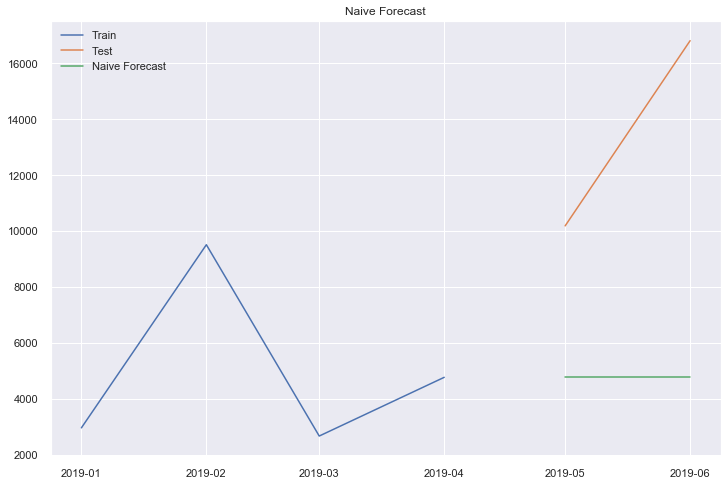

In [34]:
plt.figure(figsize=(12,8))
plt.plot(train.index, train['TotalUnitsLost'], label='Train')
plt.plot(test.index,test['TotalUnitsLost'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [35]:
y_Result['naive-MSE'] = mean_squared_error(test.TotalUnitsLost, y_hat.naive)
y_Result['naive-MAE'] = mean_absolute_error(test.TotalUnitsLost, y_hat.naive)
y_Result['naive-MAPE'] = mean_absolute_percentage_error(test.TotalUnitsLost, y_hat.naive)
print('RMSE with naive approach :')
y_Result

ConsumptionDate
2019-05-01    0.531719
2019-06-01    0.716217
dtype: float64
RMSE with naive approach :


,Feeder,naive-MSE,naive-MAE,naive-MAPE
ConsumptionDate,,,,
2019-05-01,Feeder_1,8.720318e+07,8730.981,62.396819


### Simple Average

<Figure size 864x576 with 0 Axes>

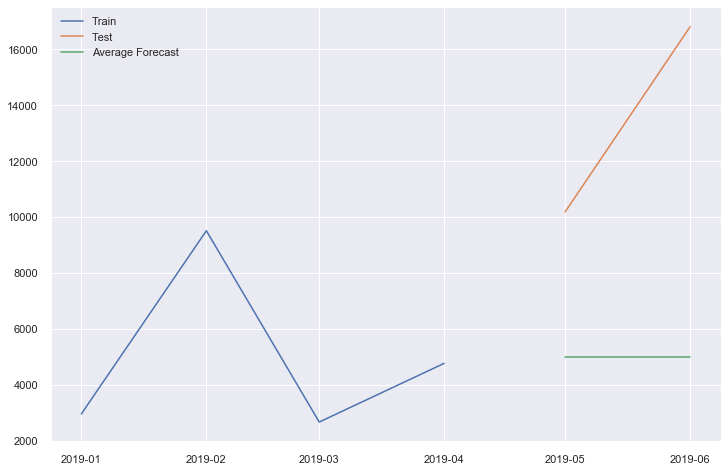

In [36]:
y_hat['avg_forecast'] = train['TotalUnitsLost'].mean()
plt.figure(figsize=(12,8))
plt.plot(train['TotalUnitsLost'], label='Train')
plt.plot(test['TotalUnitsLost'], label='Test')
plt.plot(y_hat['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [37]:
rms = sqrt(mean_squared_error(test.TotalUnitsLost, y_hat.avg_forecast))
y_Result['SimpeAvg-MSE'] = mean_squared_error(test.TotalUnitsLost, y_hat.avg_forecast)
y_Result['SimpeAvg-MAE'] = mean_absolute_error(test.TotalUnitsLost, y_hat.avg_forecast)
y_Result['SimpeAvg-MAPE'] = mean_absolute_percentage_error(test.TotalUnitsLost, y_hat.avg_forecast)
print('RMSE with Simple Average approach : ', rms)
y_Result

ConsumptionDate
2019-05-01    0.511217
2019-06-01    0.703793
dtype: float64
RMSE with Simple Average approach :  9143.2246778443


,Feeder,naive-MSE,naive-MAE,naive-MAPE,SimpeAvg-MSE,SimpeAvg-MAE,SimpeAvg-MAPE
ConsumptionDate,,,,,,,
2019-05-01,Feeder_1,8.720318e+07,8730.981,62.396819,8.359856e+07,8522.054,60.750465


### Moving Average

In [38]:
y_hat['moving_avg_forecast'] = train['TotalUnitsLost'].rolling(3).mean().iloc[-1]

<Figure size 1152x576 with 0 Axes>

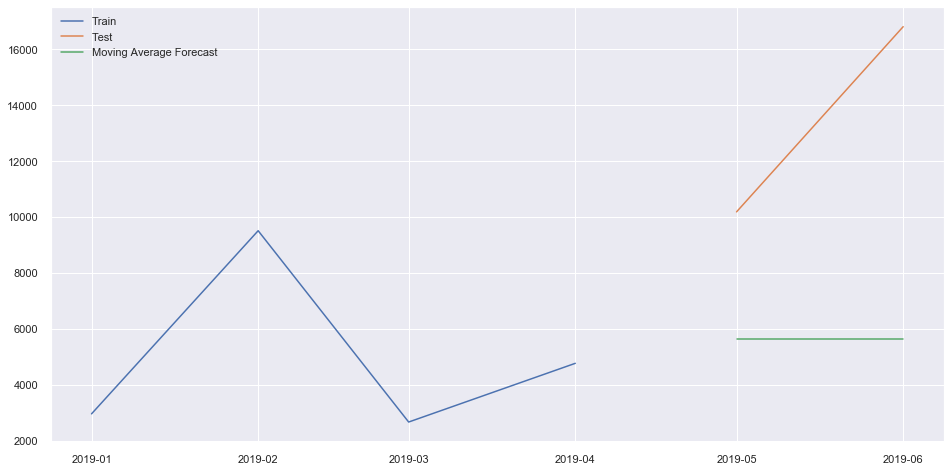

In [39]:
plt.figure(figsize=(16,8))
plt.plot(train['TotalUnitsLost'], label='Train')
plt.plot(test['TotalUnitsLost'], label='Test')
plt.plot(y_hat['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [40]:
rms = sqrt(mean_squared_error(test.TotalUnitsLost, y_hat.moving_avg_forecast))
print('RMSE with Moving Average approach : ', rms)
y_Result['MovingAvg-MSE'] = mean_squared_error(test.TotalUnitsLost, y_hat.moving_avg_forecast)
y_Result['MovingAvg-MAE'] = mean_absolute_error(test.TotalUnitsLost, y_hat.moving_avg_forecast)
y_Result['MovingAvg-MAPE'] = mean_absolute_percentage_error(test.TotalUnitsLost, y_hat.moving_avg_forecast)
y_Result

RMSE with Moving Average approach :  8520.145509037358
ConsumptionDate
2019-05-01    0.445249
2019-06-01    0.663816
dtype: float64


,Feeder,naive-MSE,naive-MAE,naive-MAPE,SimpeAvg-MSE,SimpeAvg-MAE,SimpeAvg-MAPE,MovingAvg-MSE,MovingAvg-MAE,MovingAvg-MAPE
ConsumptionDate,,,,,,,,,,
2019-05-01,Feeder_1,8.720318e+07,8730.981,62.396819,8.359856e+07,8522.054,60.750465,7.259288e+07,7849.823333,55.453256


### Simple Exponential Smoothing

<Figure size 1152x576 with 0 Axes>

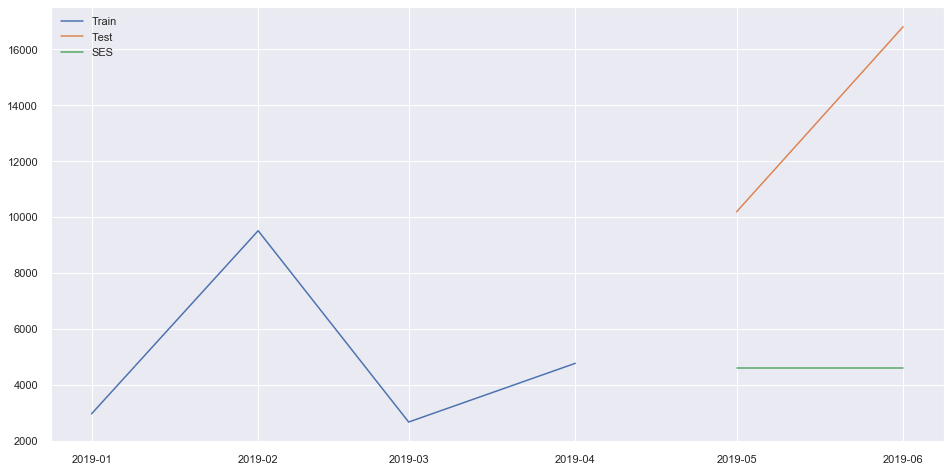

In [41]:
fit2 = SimpleExpSmoothing(np.asarray(train['TotalUnitsLost'])).fit(smoothing_level=0.6,optimized=False)
y_hat['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train['TotalUnitsLost'], label='Train')
plt.plot(test['TotalUnitsLost'], label='Test')
plt.plot(y_hat['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [42]:
rms = sqrt(mean_squared_error(test.TotalUnitsLost, y_hat.SES))
print(rms)
y_Result['SES-MSE'] = mean_squared_error(test.TotalUnitsLost, y_hat.SES)
y_Result['SES-MAE'] = mean_absolute_error(test.TotalUnitsLost, y_hat.SES)
y_Result['SES-MAPE'] = mean_absolute_percentage_error(test.TotalUnitsLost, y_hat.SES)
y_Result

9492.14372999378
ConsumptionDate
2019-05-01    0.547851
2019-06-01    0.725993
dtype: float64


,Feeder,naive-MSE,naive-MAE,naive-MAPE,SimpeAvg-MSE,SimpeAvg-MAE,SimpeAvg-MAPE,MovingAvg-MSE,MovingAvg-MAE,MovingAvg-MAPE,SES-MSE,SES-MAE,SES-MAPE
ConsumptionDate,,,,,,,,,,,,,
2019-05-01,Feeder_1,8.720318e+07,8730.981,62.396819,8.359856e+07,8522.054,60.750465,7.259288e+07,7849.823333,55.453256,9.010079e+07,8895.3718,63.692226


### Holt’s Linear Trend method

<Figure size 1440x720 with 0 Axes>

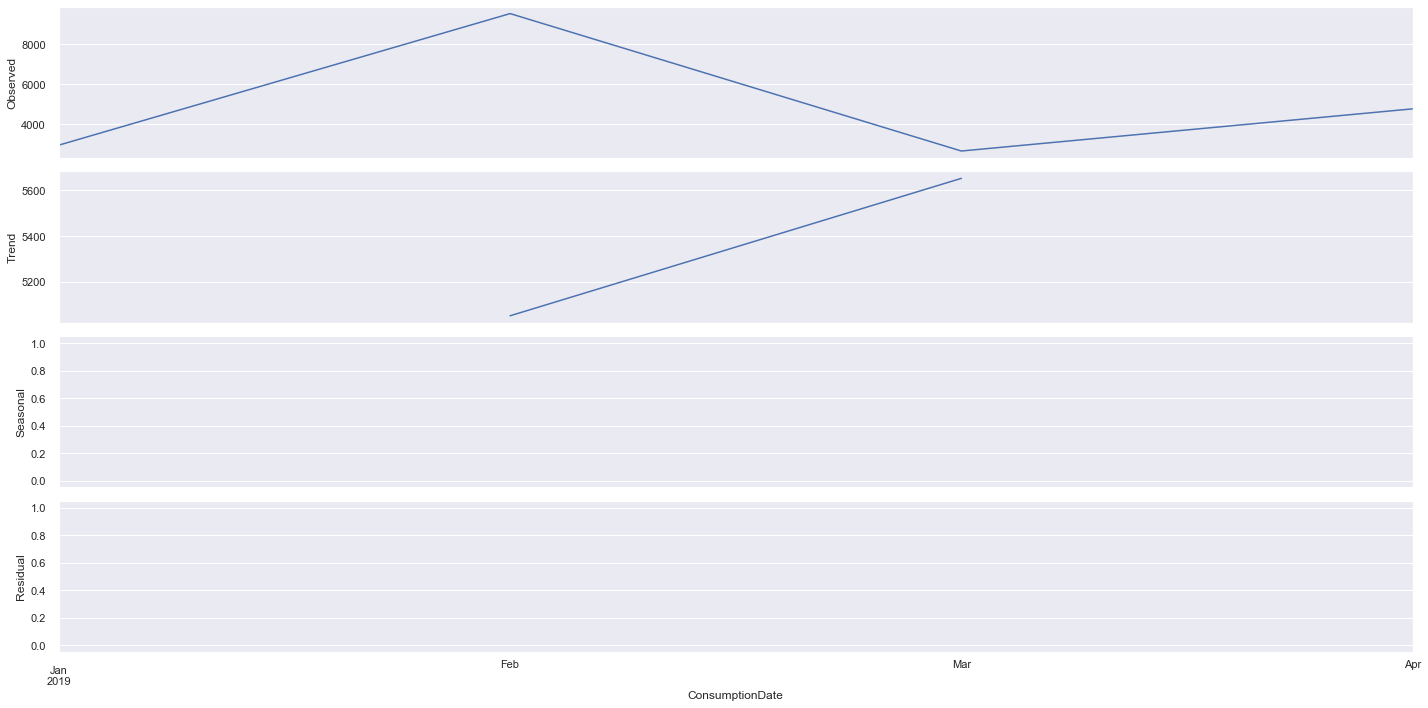

<Figure size 1440x720 with 0 Axes>

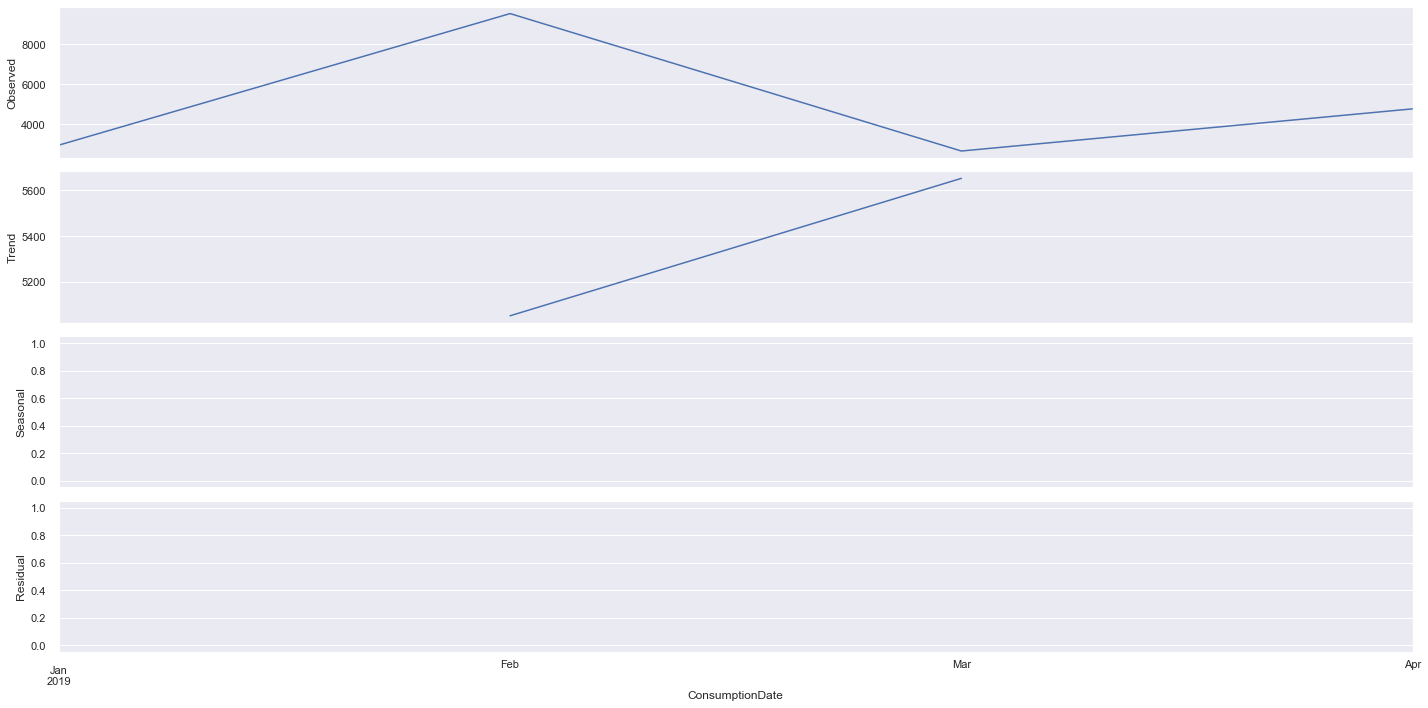

In [43]:
plt.figure(figsize=(20,10))
sm.tsa.seasonal_decompose(train.TotalUnitsLost,freq=3).plot()
result = sm.tsa.stattools.adfuller(train.TotalUnitsLost)
plt.show()

<Figure size 1152x576 with 0 Axes>

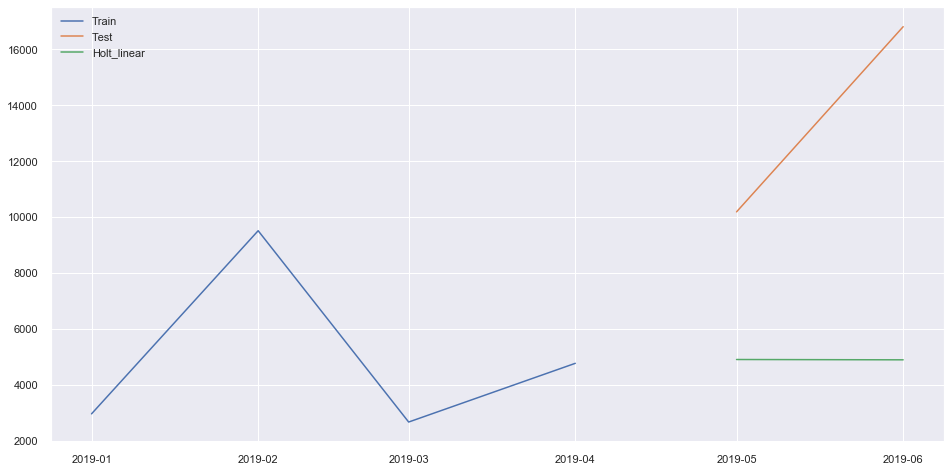

In [44]:
fit1 = Holt(np.asarray(train.TotalUnitsLost)).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train['TotalUnitsLost'], label='Train')
plt.plot(test['TotalUnitsLost'], label='Test')
plt.plot(y_hat['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [45]:

rms = sqrt(mean_squared_error(test.TotalUnitsLost, y_hat.Holt_linear))
mean_absolute_percentage_error(test.TotalUnitsLost, y_hat.Holt_linear)
print(rms)
y_Result['Holt_linear-MSE'] = mean_squared_error(test.TotalUnitsLost, y_hat.Holt_linear)
y_Result['Holt_linear-MAE'] = mean_absolute_error(test.TotalUnitsLost, y_hat.Holt_linear)
y_Result['Holt_linear-MAPE'] = mean_absolute_percentage_error(test.TotalUnitsLost, y_hat.Holt_linear)
y_Result

ConsumptionDate
2019-05-01    0.518328
2019-06-01    0.708769
dtype: float64


61.354852645936006

9218.057156919192
ConsumptionDate
2019-05-01    0.518328
2019-06-01    0.708769
dtype: float64


,Feeder,naive-MSE,naive-MAE,naive-MAPE,SimpeAvg-MSE,SimpeAvg-MAE,SimpeAvg-MAPE,MovingAvg-MSE,MovingAvg-MAE,MovingAvg-MAPE,SES-MSE,SES-MAE,SES-MAPE,Holt_linear-MSE,Holt_linear-MAE,Holt_linear-MAPE
ConsumptionDate,,,,,,,,,,,,,,,,
2019-05-01,Feeder_1,8.720318e+07,8730.981,62.396819,8.359856e+07,8522.054,60.750465,7.259288e+07,7849.823333,55.453256,9.010079e+07,8895.3718,63.692226,8.497258e+07,8600.129023,61.354853


### Holt-Winters method

<Figure size 1152x576 with 0 Axes>

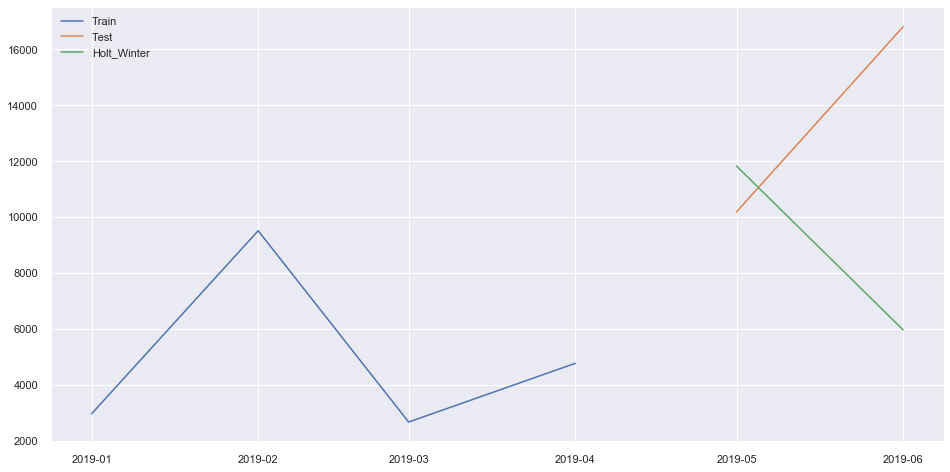

In [46]:
fit1 = ExponentialSmoothing(np.asarray(train['TotalUnitsLost']) ,seasonal_periods=3 ,trend='add', seasonal='add',).fit()
y_hat['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['TotalUnitsLost'], label='Train')
plt.plot(test['TotalUnitsLost'], label='Test')
plt.plot(y_hat['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [47]:
rms = sqrt(mean_squared_error(test.TotalUnitsLost, y_hat.Holt_Winter))
mean_absolute_percentage_error(test.TotalUnitsLost, y_hat.Holt_Winter)
print(rms)
y_Result['Holt_Winter-MSE'] = mean_squared_error(test.TotalUnitsLost, y_hat.Holt_Winter)
y_Result['Holt_Winter-MAE'] = mean_absolute_error(test.TotalUnitsLost, y_hat.Holt_Winter)
y_Result['Holt_Winter-MAPE'] = mean_absolute_percentage_error(test.TotalUnitsLost, y_hat.Holt_Winter)
y_Result

ConsumptionDate
2019-05-01    0.160846
2019-06-01    0.645177
dtype: float64


40.30114349456883

7758.440248169
ConsumptionDate
2019-05-01    0.160846
2019-06-01    0.645177
dtype: float64


,Feeder,naive-MSE,naive-MAE,naive-MAPE,SimpeAvg-MSE,SimpeAvg-MAE,SimpeAvg-MAPE,MovingAvg-MSE,MovingAvg-MAE,MovingAvg-MAPE,SES-MSE,SES-MAE,SES-MAPE,Holt_linear-MSE,Holt_linear-MAE,Holt_linear-MAPE,Holt_Winter-MSE,Holt_Winter-MAE,Holt_Winter-MAPE
ConsumptionDate,,,,,,,,,,,,,,,,,,,
2019-05-01,Feeder_1,8.720318e+07,8730.981,62.396819,8.359856e+07,8522.054,60.750465,7.259288e+07,7849.823333,55.453256,9.010079e+07,8895.3718,63.692226,8.497258e+07,8600.129023,61.354853,6.019340e+07,6244.025941,40.301143


### ARIMA method

In [48]:
train

,Feeder,TotalDemand,TotalRevenue,TotalOutageCuts,TotalOutageMinutes,TotalMinutesPerCut,MonthDays,UnitsPerMin,TotalUnitsLost
ConsumptionDate,,,,,,,,,
2019-01-01,Feeder_1,624159.0,4985411.96,24,212,8,31,13.982,2964.184
2019-02-01,Feeder_1,606149.5,4872530.70,36,633,17,28,15.033,9515.889
2019-03-01,Feeder_1,637723.5,5203000.43,26,187,7,31,14.286,2671.482
2019-04-01,Feeder_1,718271.5,5617795.97,17,287,16,30,16.627,4771.949


In [49]:
fit1 = sm.tsa.statespace.SARIMAX(train.TotalUnitsLost, order=(1, 0, 0)).fit()
fit1.predict(start="2019-05-01", end="2019-06-01", dynamic=True)

C:\Users\kiran\Anaconda3\envs\TimeSeries\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


2019-05-01    2384.570299
2019-06-01    1191.583462
Freq: MS, dtype: float64

In [50]:
y_hat['SARIMA'] = fit1.predict(start="2019-05-01", end="2019-06-01", dynamic=True)

In [51]:
y_hat

,Feeder,TotalDemand,TotalRevenue,TotalOutageCuts,TotalOutageMinutes,TotalMinutesPerCut,MonthDays,UnitsPerMin,TotalUnitsLost,naive,avg_forecast,moving_avg_forecast,SES,Holt_linear,Holt_Winter,SARIMA
ConsumptionDate,,,,,,,,,,,,,,,,
2019-05-01,Feeder_1,705281.5,5566052.72,41,645,15,31,15.799,10190.355,4771.949,4980.876,5653.106667,4607.5582,4908.412007,11829.434131,2384.570299
2019-06-01,Feeder_1,715699.5,6126206.23,23,1015,44,30,16.567,16815.505,4771.949,4980.876,5653.106667,4607.5582,4897.189947,5966.532248,1191.583462


<Figure size 1152x576 with 0 Axes>

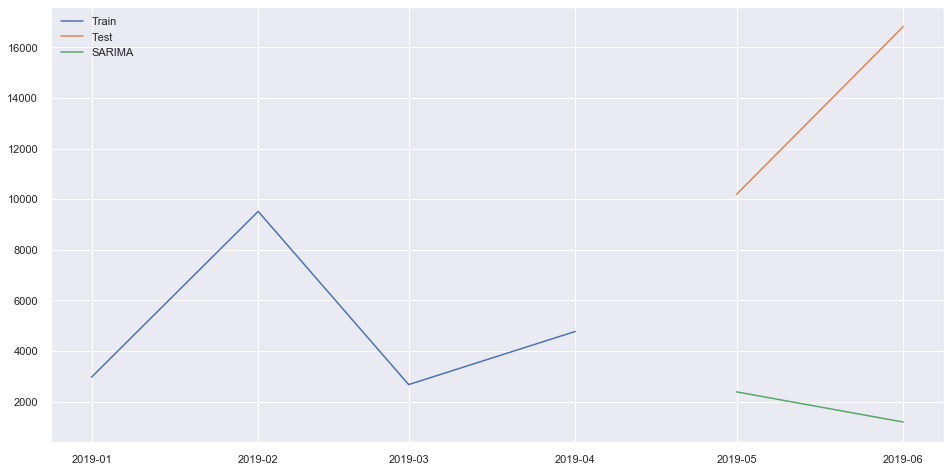

In [52]:
plt.figure(figsize=(16,8))
plt.plot( train['TotalUnitsLost'], label='Train')
plt.plot(test['TotalUnitsLost'], label='Test')
plt.plot(y_hat['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

In [53]:
rms = sqrt(mean_squared_error(test.TotalUnitsLost, y_hat.SARIMA))
print(rms)
y_Result['SARIMA-MSE'] = mean_squared_error(test.TotalUnitsLost, y_hat.SARIMA)
y_Result['SARIMA-MAE'] = mean_absolute_error(test.TotalUnitsLost, y_hat.SARIMA)
y_Result['SARIMA-MAPE'] = mean_absolute_percentage_error(test.TotalUnitsLost, y_hat.SARIMA)
y_Result

12349.842084751244
ConsumptionDate
2019-05-01    0.765997
2019-06-01    0.929138
dtype: float64


,Feeder,naive-MSE,naive-MAE,naive-MAPE,SimpeAvg-MSE,SimpeAvg-MAE,SimpeAvg-MAPE,MovingAvg-MSE,MovingAvg-MAE,MovingAvg-MAPE,...,SES-MAPE,Holt_linear-MSE,Holt_linear-MAE,Holt_linear-MAPE,Holt_Winter-MSE,Holt_Winter-MAE,Holt_Winter-MAPE,SARIMA-MSE,SARIMA-MAE,SARIMA-MAPE
ConsumptionDate,,,,,,,,,,,,,,,,,,,,,
2019-05-01,Feeder_1,8.720318e+07,8730.981,62.396819,8.359856e+07,8522.054,60.750465,7.259288e+07,7849.823333,55.453256,...,63.692226,8.497258e+07,8600.129023,61.354853,6.019340e+07,6244.025941,40.301143,1.525186e+08,11714.85312,84.756757


### Auto ARIMA method

In [54]:
import pmdarima as pm

C:\Users\kiran\Anaconda3\envs\TimeSeries\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\kiran\Anaconda3\envs\TimeSeries\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [55]:
# Fit your model
model = pm.auto_arima(train.TotalUnitsLost, seasonal=False)

C:\Users\kiran\Anaconda3\envs\TimeSeries\lib\site-packages\statsmodels\tsa\ar_model.py:763: RuntimeWarning: divide by zero encountered in log
  return np.log(self.sigma2) + (1 + self.df_model) * np.log(nobs)/nobs
C:\Users\kiran\Anaconda3\envs\TimeSeries\lib\site-packages\statsmodels\tsa\tsatools.py:695: RuntimeWarning: divide by zero encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
C:\Users\kiran\Anaconda3\envs\TimeSeries\lib\site-packages\statsmodels\tools\numdiff.py:243: RuntimeWarning: invalid value encountered in subtract
  **kwargs)).imag/2./hess[i, j]
C:\Users\kiran\Anaconda3\envs\TimeSeries\lib\site-packages\statsmodels\tsa\tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\kiran\Anaconda3\envs\TimeSeries\lib\site-packages\statsmodels\tsa\tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


In [56]:
forecasts = model.predict(test.shape[0])  # predict N steps into the future

In [57]:
# Visualize the forecasts (blue=train, green=forecasts)
x = np.arange(dfFeederData.shape[0]-1)
x
forecasts = pd.DataFrame(forecasts,index = test.index,columns=['Prediction'])
y_hat['AutoARIMA'] = forecasts

array([0, 1, 2, 3, 4])

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

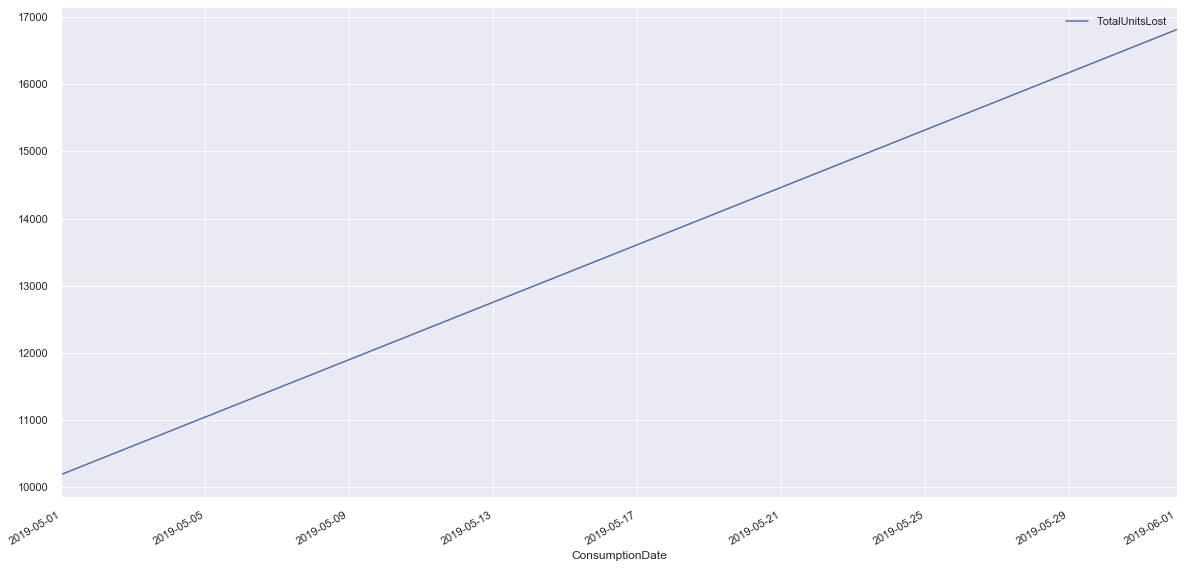

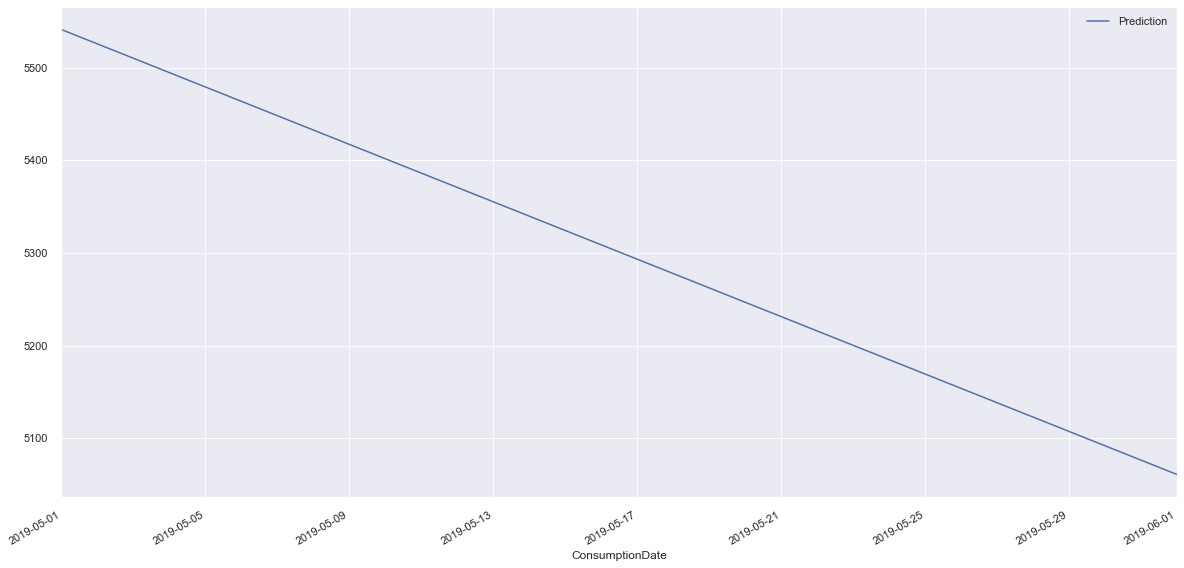

In [58]:
#plt.plot(test.Demand, c='blue')
#plt.plot(forecasts, c='green')
plt.figure(figsize = (20,10))
pd.DataFrame(test.TotalUnitsLost).plot()
pd.DataFrame(forecasts).plot()
plt.show()

In [59]:
rms=np.sqrt(np.mean(np.power((np.array(test.TotalUnitsLost)-np.array(forecasts['Prediction'])),2)))
mean_absolute_percentage_error(test.TotalUnitsLost, forecasts['Prediction'])
rms

ConsumptionDate
2019-05-01    0.456213
2019-06-01    0.699028
dtype: float64


57.7620080354511

8938.154435859942

In [60]:
y_Result['AutoARIMA-MSE'] = mean_squared_error(test.TotalUnitsLost, y_hat.AutoARIMA)
y_Result['AutoARIMA-MAE'] = mean_absolute_error(test.TotalUnitsLost, y_hat.AutoARIMA)
y_Result['AutoARIMA-MAPE'] = mean_absolute_percentage_error(test.TotalUnitsLost, y_hat.AutoARIMA)
y_Result

ConsumptionDate
2019-05-01    0.456213
2019-06-01    0.699028
dtype: float64


,Feeder,naive-MSE,naive-MAE,naive-MAPE,SimpeAvg-MSE,SimpeAvg-MAE,SimpeAvg-MAPE,MovingAvg-MSE,MovingAvg-MAE,MovingAvg-MAPE,...,Holt_linear-MAPE,Holt_Winter-MSE,Holt_Winter-MAE,Holt_Winter-MAPE,SARIMA-MSE,SARIMA-MAE,SARIMA-MAPE,AutoARIMA-MSE,AutoARIMA-MAE,AutoARIMA-MAPE
ConsumptionDate,,,,,,,,,,,,,,,,,,,,,
2019-05-01,Feeder_1,8.720318e+07,8730.981,62.396819,8.359856e+07,8522.054,60.750465,7.259288e+07,7849.823333,55.453256,...,61.354853,6.019340e+07,6244.025941,40.301143,1.525186e+08,11714.85312,84.756757,7.989060e+07,8201.73488,57.762008


<Figure size 1440x576 with 0 Axes>

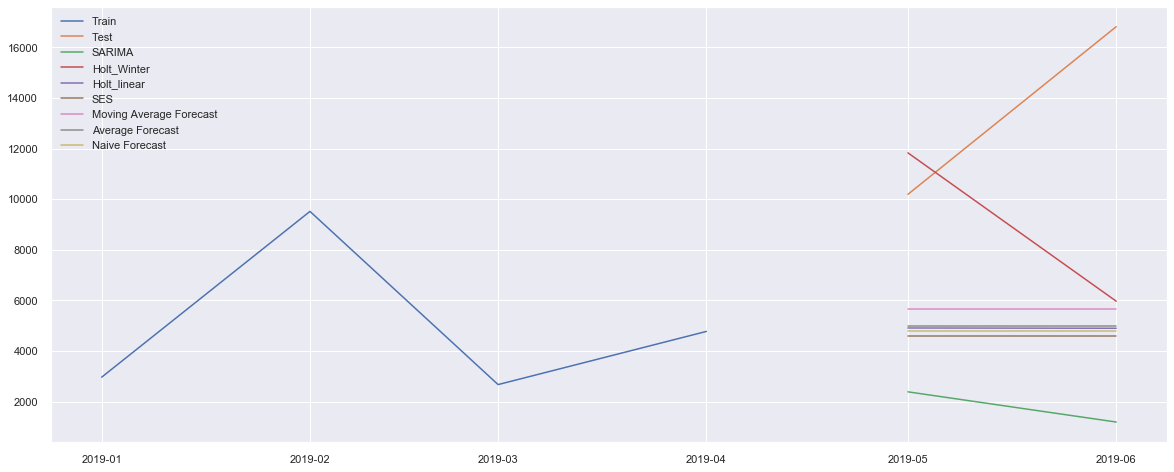

In [61]:
plt.figure(figsize=(20,8))
plt.plot( train['TotalUnitsLost'], label='Train')
plt.plot(test['TotalUnitsLost'], label='Test')
plt.plot(y_hat['SARIMA'], label='SARIMA')
plt.plot(y_hat['Holt_Winter'], label='Holt_Winter')
plt.plot(y_hat['Holt_linear'], label='Holt_linear')
plt.plot(y_hat['SES'], label='SES')
plt.plot(y_hat['moving_avg_forecast'], label='Moving Average Forecast')
plt.plot(y_hat['avg_forecast'], label='Average Forecast')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')

plt.legend(loc='best')
plt.show()

In [62]:
y_Result.to_csv('Feeder_1.csv')